In [1]:
import xarray as xr
import os.path
import pandas as pd
from glob import glob

import matplotlib.pyplot as plt
import numpy as np


import cartopy.crs as ccrs
import seaborn as sns
from matplotlib import transforms

In [2]:
experiments = ['ssp126', 'ssp245', 'ssp370', 'ssp370-lowNTCF', 'ssp585'] #	ScenarioMIP

In [3]:
Y = xr.open_dataset('train_val/outputs_ssp126.nc')

In [4]:
data_path = 'train_val/'

# Only future scenarios for now
inputs = glob(data_path + "inputs_s*.nc")

In [5]:
inputs

['train_val/inputs_ssp126.nc',
 'train_val/inputs_ssp370-lowNTCF.nc',
 'train_val/inputs_ssp370.nc',
 'train_val/inputs_ssp585.nc']

In [6]:
proj = ccrs.Mollweide()

In [7]:
all_inputs = glob(data_path + "inputs_*.nc")
global_means = {}

def global_total(da):
    if 'latitude' in da.coords:
        if da.name in ['CO2', 'CH4', 'tas']:
            return global_mean(da)
        else:
            return convert(global_sum(da*AREA_of_EARTH*1000*100))
    else:
        return da

for inp in glob(data_path + "inputs_*.nc"):
    label=inp.split('_')[3][:-3]
    X = xr.open_dataset(inp)
    Y = xr.open_dataset(data_path + f"outputs_{label}.nc")
#     print(X.coords)
    print(label)
#     if label == "hist-aer":
#         X = X.rename_vars({"CO4": "CO2"})
    if 'lat' in X.coords:
        X = X.rename({'lat': 'latitude', 'lon': 'longitude'})
    if 'lat' in Y.coords:
        Y = Y.rename({'lat': 'latitude', 'lon': 'longitude'})

    if label == "abrupt-4xCO2":
        X = X.sel(time=slice(None, None, 5))
    X['tas'] = Y['tas'].mean('member')
    
    global_means[label] = X.map(global_total).to_pandas()

# print(global_means)

IndexError: list index out of range

KeyError: "not all values found in index 'time'. Try setting the `method` keyword argument (example: method='nearest')."

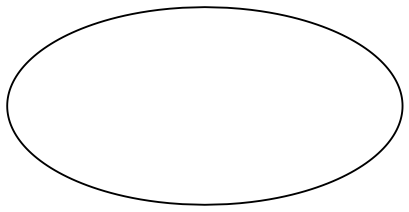

In [73]:
import matplotlib
with sns.plotting_context("talk"):

    norm = matplotlib.colors.LogNorm(1e-17, 1e-10, clip=True)
    norm = matplotlib.colors.LogNorm(1e-15, 1e-9, clip=True)
    fig = plt.figure(figsize=(18, 8))
    plt.subplot(221, projection=proj)
    X["SO2"].sel(time=1850).plot(transform=ccrs.PlateCarree(), add_colorbar=False, norm=norm)
    plt.gca().coastlines()
    plt.gca().set_title('1850')
    add_label('a)')

    plt.subplot(222, projection=proj)
    X["SO2"].sel(time=1970).plot(transform=ccrs.PlateCarree(), add_colorbar=False, norm=norm)
    plt.gca().coastlines()
    plt.gca().set_title('1970')
    add_label('b)')

    plt.subplot(223, projection=proj)
    X["SO2"].sel(time=2020).plot(transform=ccrs.PlateCarree(), add_colorbar=False, norm=norm)
    plt.gca().coastlines()
    plt.gca().set_title('2020')
    add_label('c)')

    plt.subplot(224, projection=proj)
    m=X["SO2"].sel(time=2100).plot(transform=ccrs.PlateCarree(), add_colorbar=False, norm=norm)
    plt.gca().coastlines()
    plt.gca().set_title('2100')
    add_label('d)')

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(m, cax=cbar_ax, extend='both')
    cbar.set_label('Anthropogenic SO2 emissions (kg / m2 / s)')
    
    #plt.savefig("Figure_2.pdf")

In [80]:
inputs

['train_val/inputs_ssp126.nc',
 'train_val/inputs_ssp370-lowNTCF.nc',
 'train_val/inputs_ssp370.nc',
 'train_val/inputs_ssp585.nc']

In [85]:
Y = xr.open_dataset('train_val/outputs_ssp126.nc')

## Figure 3

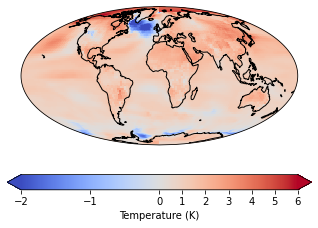

In [8]:
from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vmin=-2., vcenter=0., vmax=6)
fig = plt.figure(figsize=(12, 8))
plt.subplot(221, projection=proj)
Y["tas"].sel(time=2100, member=1).plot(cmap="coolwarm", norm=divnorm, vmax=6, transform=ccrs.PlateCarree(), add_labels=False,
                                       cbar_kwargs={"label":"Temperature (K)", "orientation":'horizontal'})
plt.gca().coastlines()

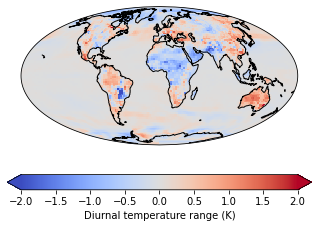

In [9]:
fig = plt.figure(figsize=(12, 8))
plt.subplot(221, projection=proj)
Y["diurnal_temperature_range"].sel(time=2100, member=1).plot(cmap="coolwarm", vmax=2, transform=ccrs.PlateCarree(), add_labels=False,
                                                             cbar_kwargs={"label":"Diurnal temperature range (K)", "orientation":'horizontal'})
plt.gca().coastlines()

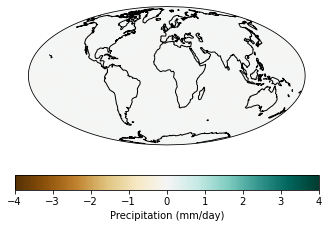

In [10]:
fig = plt.figure(figsize=(12, 8))
plt.subplot(221, projection=proj)
(Y["pr"].sel(time=2100, member=1)).plot(cmap="BrBG", transform=ccrs.PlateCarree(), vmin=-4, vmax=4, add_labels=False,
                                 cbar_kwargs={"label":"Precipitation (mm/day)", "orientation":'horizontal'})
plt.gca().coastlines()

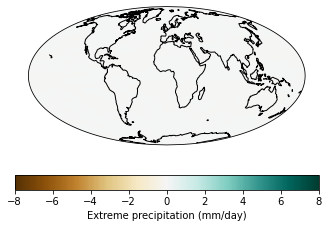

In [11]:
fig = plt.figure(figsize=(12, 8))
plt.subplot(221, projection=proj)
(Y["pr90"].sel(time=2100, member=1)).plot(cmap="BrBG", transform=ccrs.PlateCarree(), vmin=-8, vmax=8, add_labels=False,
                                          cbar_kwargs={"label":"Extreme precipitation (mm/day)", "orientation":'horizontal'})
plt.gca().coastlines()